# An√°lise Gr√°fica das implementa√ß√µes da Mochila (Knapsack)

<em>Feito por <b>Lucas Guerreiro Pellegrini</b></em>
<em> e <b>Gabriel Teodoro Ribeiro;</b></em>

<em>Para a disciplina de An√°lise de Algoritmos.</em>

### C√≥digo:

In [1]:
import numpy as np
import math
import tracemalloc
from timeit import default_timer as timer
import matplotlib.pyplot as plt

In [2]:
PESO = 1
VALOR = 0

<h3 align="center"> Implementa√ß√£o Recursiva: </h3>

In [3]:
def mochila_exponencial(k, coisas, n):
    if n == 0:
        if coisas[n][PESO] <= k:
            return coisas[n][VALOR]
        return 0

    valorCom = -1
    if k >= coisas[n][PESO]:
        valorCom = mochila_exponencial(k - coisas[n][PESO], coisas, n - 1) + coisas[n][VALOR]

    valorSem = mochila_exponencial(k, coisas, n - 1)

    return max(valorCom, valorSem)

<h3 align="center"> Implementa√ß√£o Memoizada: </h3>

In [4]:
class MochilaMemo:
    def __init__(self):
        self.dic = {}

    def resolve(self, k, coisas, n):
        if n == 0:
            if coisas[n][PESO] <= k:
                return coisas[n][VALOR]
            return 0

        if (n, k) in self.dic:
            return self.dic[(n, k)]

        # Calcula o poss√≠vel valor sem o elemento
        valorSem = self.resolve(k, coisas, n - 1)

        # Calcula o poss√≠vel valor com o elemento
        if k >= coisas[n][PESO]:
            valorCom = self.resolve(k - coisas[n][PESO], coisas, n - 1) + coisas[n][VALOR]
            self.dic[(n, k)] = max(valorCom, valorSem)
        # Se n√£o cabe, √© sem mesmo
        else:
            self.dic[(n, k)] = valorSem

        return self.dic[(n, k)]

<h3 align="center"> Implementa√ß√£o com Programa√ß√£o Din√¢mica: </h3>

In [5]:
class MochilaPD:
    def __init__(self):
        self.matriz = [[]]
        self.resposta = -1

    def resolve(self, k, coisas):
        self.matriz = np.zeros((len(coisas), k+1))

        for i in range(len(coisas)):
            for c in range(0, k+1):
                if coisas[i - 1][PESO] > c:
                    self.matriz[i][c] = self.matriz[i - 1][c]
                else:
                    menorSem = self.matriz[i - 1][c]
                    menorCom = self.matriz[i - 1][c - coisas[i - 1][PESO]] + coisas[i - 1][VALOR]
                    self.matriz[i][c] = max(menorSem, menorCom)

        self.acha_maior()

    def acha_maior(self):
        for linha in self.matriz:
            for elem in linha:
                if elem > self.resposta:
                    self.resposta = elem

<h3 align="center"> Implementa√ß√£o Aproximada (IK): </h3>

In [6]:
class MochilaA:
    def __init__(self):
        self.matriz = [[]]
        self.resposta = -1

    def resolve(self, k, coisas, epsilon = 0.2):
        coisas = self.pre_processamento_IK(k, coisas, epsilon)

        self.matriz = np.zeros((len(coisas), k+1))

        for i in range(len(coisas)):
            for c in range(0, k+1):
                if coisas[i - 1][PESO] > c:
                    self.matriz[i][c] = self.matriz[i - 1][c]
                else:
                    menorSem = self.matriz[i - 1][c]
                    menorCom = self.matriz[i - 1][c - coisas[i - 1][PESO]] + coisas[i - 1][VALOR]
                    self.matriz[i][c] = max(menorSem, menorCom)

        self.acha_maior()

    def acha_maior(self):
        for linha in self.matriz:
            for elem in linha:
                if elem > self.resposta:
                    self.resposta = elem

    def pre_processamento_IK(self, k, coisas, epsilon):
        # Remove elementos com peso maior que a capacidade
        coisas[:] = [x for x in coisas if x[PESO] <= k]

        # IBARRA-KIM
        sigma = max(coisas)[VALOR]
        #epsilon = np.random.ranf()
        print(f"\u03B5 = {epsilon}")
        lmbd = (epsilon * sigma) / (len(coisas)-1)

        u = []
        for valor, peso in coisas:
            u.append(tuple((int(math.floor(valor/lmbd)), peso)))
            
        return u

<h2><center> Testes: </center></h2>

In [7]:
lista_coisas = [(10, 5), (40, 4), (30, 6), (50, 3)]
lista_coisas2 = [(10, 5), (40, 4), (30, 6), (50, 3), (15, 5), (26, 4), (21, 6), (17, 3), (12, 2), (24, 3), (22, 6),
                     (21, 3), (18, 2), (36, 4), (55, 9), (60, 7), (35, 6), (25, 12), (80, 9), (55, 15), (40, 15),
                     (79, 19), (99, 25)]
lista_coisas3 = [(10, 5), (40, 4), (30, 6), (50, 3), (15, 5), (26, 4), (21, 6), (17, 3), (12, 2), (24, 3), (22, 6),
                     (21, 3), (18, 2), (36, 4), (55, 9), (60, 7), (35, 6), (25, 12), (80, 9), (55, 15), (40, 15),
                     (79, 19), (99, 25), (100, 28), (105, 30), (110, 30), (112, 29), (120, 32), (124, 33), (130, 40),
                     (131, 31), (129, 46), (150, 40), (155, 45), (170, 60), (169, 58)]
lista_coisas4 = [(10, 5), (40, 4), (30, 6), (50, 3), (15, 5), (26, 4), (21, 6), (17, 3), (12, 2), (24, 3), (22, 6),
                     (21, 3), (18, 2), (36, 4), (55, 9), (60, 7), (35, 6), (25, 12), (80, 9), (55, 15), (40, 15),
                     (79, 19), (99, 25), (100, 28), (105, 30), (110, 30), (112, 29), (120, 32), (124, 33), (130, 40),
                     (131, 31), (129, 46), (150, 40), (155, 45), (170, 60), (169, 58), (170, 60), (170, 60), (180, 65),
                     (181, 62), (185, 70), (190, 80), (199, 85), (185, 75), (200, 100), (210, 105), (220, 106), (250, 120)]

<div class="alert alert-block alert-warning"><b>Sobre os testes: </b> Os testes consistem em executar o algoritmo com as mesmas entradas; sendo elas as 4 listas "lista_coisasX" e suas respectivas capacidades: 15, 40, 100, 130 </div>

<h4><center> Teste 1: </center></h4>

###### Algoritmo Recursivo:

In [8]:
tracemalloc.start()
start = timer()

resultado = mochila_exponencial(15, lista_coisas, len(lista_coisas)-1)

end = timer()
_, pico1r = tracemalloc.get_traced_memory()
tracemalloc.stop()

t1r = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t1r}s")
print(f"Pico de mem√≥ria: {pico1r}b")

Resultado: 120
Tempo gasto: 0.0001554999999999751s
Pico de mem√≥ria: 13407b


###### Algoritmo Memoizado:

In [9]:
mochila = MochilaMemo()
tracemalloc.start()
start = timer()

resultado = mochila.resolve(15, lista_coisas, len(lista_coisas)-1)

end = timer()
_, pico1m = tracemalloc.get_traced_memory()
tracemalloc.stop()

t1m = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t1m}s")
print(f"Pico de mem√≥ria: {pico1m}b")

Resultado: 120
Tempo gasto: 0.0001592000000005811s
Pico de mem√≥ria: 13777b


###### Algoritmo de Programa√ß√£o Din√¢mica:

In [10]:
mochila = MochilaPD()
tracemalloc.start()
start = timer()

mochila.resolve(15, lista_coisas)

end = timer()
_, pico1p = tracemalloc.get_traced_memory()
tracemalloc.stop()

t1p = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t1p}s")
print(f"Pico de mem√≥ria: {pico1p}b")

Resultado: 120.0
Tempo gasto: 0.000560000000000116s
Pico de mem√≥ria: 13153b


###### Algoritmo de Aproxima√ß√£o:

In [11]:
mochila = MochilaA()
tracemalloc.start()
start = timer()

mochila.resolve(15, lista_coisas)

end = timer()
_, pico1a = tracemalloc.get_traced_memory()
tracemalloc.stop()

t1a = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t1a}s")
print(f"Pico de mem√≥ria: {pico1a}b")

Œµ = 0.2
Resultado: 36.0
Tempo gasto: 0.0008609999999986684s
Pico de mem√≥ria: 15312b


<h4><center> Teste 2: </center></h4>

###### Algoritmo Recursivo:

In [12]:
tracemalloc.start()
start = timer()

resultado = mochila_exponencial(40, lista_coisas2, len(lista_coisas2)-1)

end = timer()
_, pico2r = tracemalloc.get_traced_memory()
tracemalloc.stop()

t2r = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t2r}s")
print(f"Pico de mem√≥ria: {pico2r}b")

Resultado: 358
Tempo gasto: 0.24463179999999873s
Pico de mem√≥ria: 170827b


###### Algoritmo Memoizado:

In [13]:
mochila = MochilaMemo()
tracemalloc.start()
start = timer()

resultado = mochila.resolve(40, lista_coisas2, len(lista_coisas2)-1)

end = timer()
_, pico2m = tracemalloc.get_traced_memory()
tracemalloc.stop()

t2m = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t2m}s")
print(f"Pico de mem√≥ria: {pico2m}b")

Resultado: 358
Tempo gasto: 0.0017960999999999672s
Pico de mem√≥ria: 40426b


###### Algoritmo de Programa√ß√£o Din√¢mica:

In [14]:
mochila = MochilaPD()
tracemalloc.start()
start = timer()

mochila.resolve(40, lista_coisas2)

end = timer()
_, pico2p = tracemalloc.get_traced_memory()
tracemalloc.stop()

t2p = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t2p}s")
print(f"Pico de mem√≥ria: {pico2p}b")

Resultado: 358.0
Tempo gasto: 0.005591700000000088s
Pico de mem√≥ria: 18809b


###### Algoritmo de Aproxima√ß√£o:

In [15]:
mochila = MochilaA()
tracemalloc.start()
start = timer()

mochila.resolve(40, lista_coisas2)

end = timer()
_, pico2a = tracemalloc.get_traced_memory()
tracemalloc.stop()

t2a = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t2a}s")
print(f"Pico de mem√≥ria: {pico2a}b")

Œµ = 0.2
Resultado: 393.0
Tempo gasto: 0.006422500000002884s
Pico de mem√≥ria: 21326b


<h4><center> Teste 3: </center></h4>

###### Algoritmo Recursivo:

In [16]:
tracemalloc.start()
start = timer()

resultado = mochila_exponencial(100, lista_coisas3, len(lista_coisas3)-1)

end = timer()
_, pico3r = tracemalloc.get_traced_memory()
tracemalloc.stop()

t3r = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t3r}s")
print(f"Pico de mem√≥ria: {pico3r}b")

Resultado: 645
Tempo gasto: 31.523111s
Pico de mem√≥ria: 176542b


###### Algoritmo Memoizado:

In [17]:
mochila = MochilaMemo()
tracemalloc.start()
start = timer()

resultado = mochila.resolve(100, lista_coisas3, len(lista_coisas3)-1)

end = timer()
_, pico3m = tracemalloc.get_traced_memory()
tracemalloc.stop()

t3m = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t3m}s")
print(f"Pico de mem√≥ria: {pico3m}b")

Resultado: 645
Tempo gasto: 0.006206000000005929s
Pico de mem√≥ria: 164537b


###### Algoritmo de Programa√ß√£o Din√¢mica:

In [18]:
mochila = MochilaPD()
tracemalloc.start()
start = timer()

mochila.resolve(100, lista_coisas3)

end = timer()
_, pico3p = tracemalloc.get_traced_memory()
tracemalloc.stop()

t3p = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t3p}s")
print(f"Pico de mem√≥ria: {pico3p}b")

Resultado: 645.0
Tempo gasto: 0.020576399999995942s
Pico de mem√≥ria: 41232b


###### Algoritmo de Aproxima√ß√£o:

In [19]:
mochila = MochilaA()
tracemalloc.start()
start = timer()

mochila.resolve(100, lista_coisas3)

end = timer()
_, pico3a = tracemalloc.get_traced_memory()
tracemalloc.stop()

t3a = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t3a}s")
print(f"Pico de mem√≥ria: {pico3a}b")

Œµ = 0.2
Resultado: 656.0
Tempo gasto: 0.02159120000000314s
Pico de mem√≥ria: 42650b


<h4><center> Teste 4: </center></h4>

###### Algoritmo Recursivo:

In [20]:
tracemalloc.start()
start = timer()

resultado = mochila_exponencial(130, lista_coisas4, len(lista_coisas4)-1)

end = timer()
_, pico4r = tracemalloc.get_traced_memory()
tracemalloc.stop()

t4r = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t4r}s")
print(f"Pico de mem√≥ria: {pico4r}b")

Resultado: 769
Tempo gasto: 166.598144s
Pico de mem√≥ria: 160888b


###### Algoritmo Memoizado:

In [21]:
mochila = MochilaMemo()
tracemalloc.start()
start = timer()

resultado = mochila.resolve(130, lista_coisas4, len(lista_coisas4)-1)

end = timer()
_, pico4m = tracemalloc.get_traced_memory()
tracemalloc.stop()

t4m = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t4m}s")
print(f"Pico de mem√≥ria: {pico4m}b")

Resultado: 769
Tempo gasto: 0.00952770000003511s
Pico de mem√≥ria: 294242b


###### Algoritmo de Programa√ß√£o Din√¢mica:

In [22]:
mochila = MochilaPD()
tracemalloc.start()
start = timer()

mochila.resolve(130, lista_coisas4)

end = timer()
_, pico4p = tracemalloc.get_traced_memory()
tracemalloc.stop()

t4p = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t4p}s")
print(f"Pico de mem√≥ria: {pico4p}b")

Resultado: 769.0
Tempo gasto: 0.034031999999967866s
Pico de mem√≥ria: 63144b


###### Algoritmo de Aproxima√ß√£o:

In [23]:
mochila = MochilaA()
tracemalloc.start()
start = timer()

mochila.resolve(130, lista_coisas4)

end = timer()
_, pico4a = tracemalloc.get_traced_memory()
tracemalloc.stop()

t4a = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t4a}s")
print(f"Pico de mem√≥ria: {pico4a}b")

Œµ = 0.2
Resultado: 714.0
Tempo gasto: 0.03353399999997464s
Pico de mem√≥ria: 63376b


<h2><center> An√°lise Gr√°fica e Conclus√£o: </center></h2>

<div class="alert alert-block alert-warning"><b>Sobre o tamanho da entrada: </b> Como a entrada consiste de dois elementos (a lista de coisas e a capacidade da mochila), consideraremos como tamanho de entrada cada um dos 4 testes. </div>

<h3><center> Testes Individuais: </center></h3>

### Crescimento do Algoritmo Recursivo, de acordo com o crescimento da entrada:

###### Mem√≥ria:

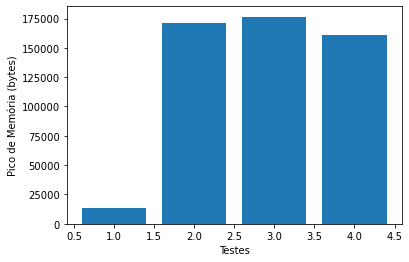

In [24]:
plt.bar([1, 2, 3, 4], [pico1r, pico2r, pico3r, pico4r])
plt.ylabel('Pico de Mem√≥ria (bytes)')
plt.xlabel('Testes')
plt.show()

Como esperado, com o aumento da entrada houve um aumento consider√°vel no pico de mem√≥ria durante a execu√ß√£o do algoritmo.

###### Tempo:

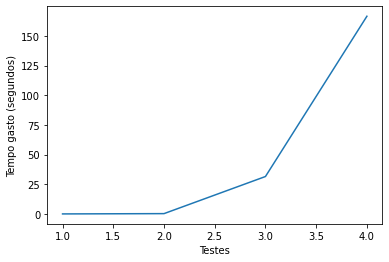

In [25]:
plt.plot([1, 2, 3, 4], [t1r, t2r, t3r, t4r])
plt.ylabel('Tempo gasto (segundos)')
plt.xlabel('Testes')
plt.show()

√â insteressante notar que, j√° no o terceiro teste, o tempo distancia-se comparado aos testes 1 e 2. Ainda, √© s√≥ no quarto e maior teste que o tempo gasto dispara astronomicamente, o que exemplifica a caracter√≠stica do custo exponencial do algoritmo.

### Crescimento do Algoritmo Memoizado, de acordo com o crescimento da entrada:

###### Mem√≥ria:

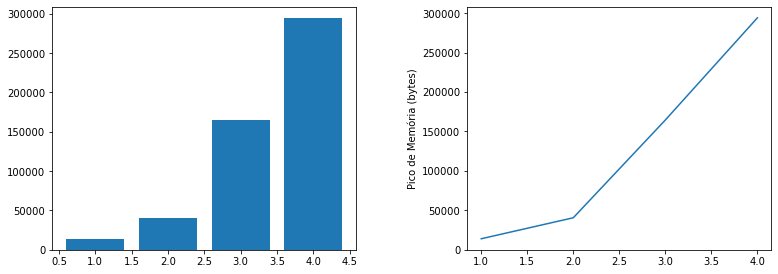

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))


ax[0].bar([1, 2, 3, 4], [pico1m, pico2m, pico3m, pico4m])
ax[1].set_ylabel('Pico de Mem√≥ria (bytes)')
ax[1].set_label('Testes')


ax[1].plot([1, 2, 3, 4], [pico1m, pico2m, pico3m, pico4m])
ax[1].set_ylabel('Pico de Mem√≥ria (bytes)')
ax[1].set_label('Testes')

fig.tight_layout(pad=5.0)
plt.show()

Como esperado, o algoritmo memoizado apresenta um custo alto em termos de mem√≥ria. Al√©m disso, sua curva de crescimento √© quase que linear de acordo com o crescimento das entradas apresentadas.

###### Tempo:

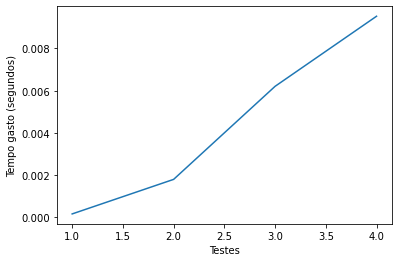

In [27]:
plt.plot([1, 2, 3, 4], [t1m, t2m, t3m, t4m])
plt.ylabel('Tempo gasto (segundos)')
plt.xlabel('Testes')
plt.show()

O crescimento do tempo consumido para com o tamanho da entrada √© quase linear. Assimilando-se √† curva de crescimento do consumo de mem√≥ria. Por√©m, nota-se um crescimento mais acentuado entre os testes 2 e 3

### Crescimento do Algoritmo de Programa√ß√£o Din√¢mica, de acordo com o crescimento da entrada:

###### Mem√≥ria:

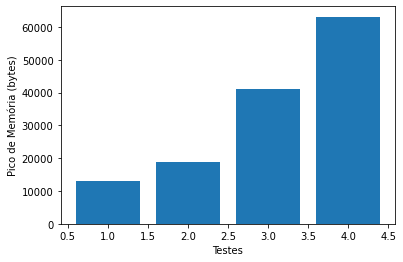

In [28]:
plt.bar([1, 2, 3, 4], [pico1p, pico2p, pico3p, pico4p])

plt.ylabel('Pico de Mem√≥ria (bytes)')
plt.xlabel('Testes')
plt.show()

Para os dois primeiros testes, o pico de mem√≥ria √© relativamente baixo, contudo, a partir do terceiro teste, h√° um consumo muito maior de mem√≥ria. Acredita-se que isso se d√° devido ao uso da estrutura de dados matricial de tamanho: $n * k$ (com n = Tamanho do subconjunto e k = Capacidade da mochila).


###### Tempo:

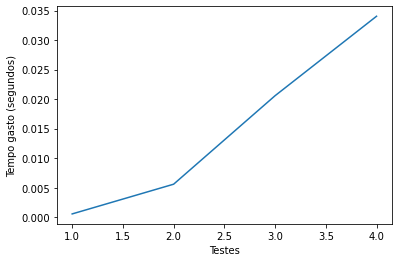

In [29]:
plt.plot([1, 2, 3, 4], [t1p, t2p, t3p, t4p])
plt.ylabel('Tempo gasto (segundos)')
plt.xlabel('Testes')
plt.show()

Mesmo o custo em mem√≥ria sendo t√£o distinto para os pares de testes, a curva de tempo gasto segue uma apresenta√ß√£o de crescimento quase linear.

### Crescimento do Algoritmo de Aproxima√ß√£o, de acordo com o crescimento da entrada:

###### Mem√≥ria:

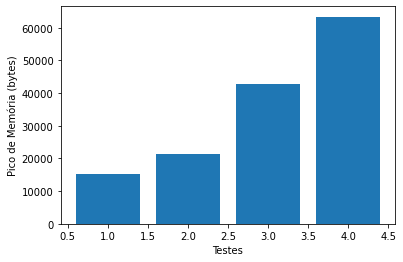

In [30]:
plt.bar([1, 2, 3, 4], [pico1a, pico2a, pico3a, pico4a])
plt.ylabel('Pico de Mem√≥ria (bytes)')
plt.xlabel('Testes')
plt.show()

Como o algoritmo re-utiliza c√≥digo do algoritmo de Programa√ß√£o Din√¢mica, √© de se esperar que os resultados sejam muito pr√≥ximos.

###### Tempo:

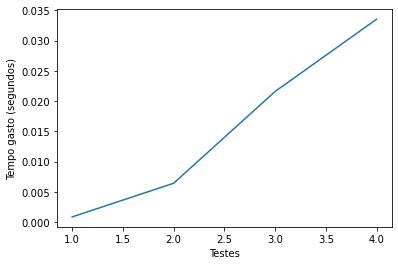

In [31]:
plt.plot([1, 2, 3, 4], [t1a, t2a, t3a, t4a])
plt.ylabel('Tempo gasto (segundos)')
plt.xlabel('Testes')
plt.show()

Como o algoritmo re-utiliza c√≥digo do algoritmo de Programa√ß√£o Din√¢mica, √© de se esperar que os resultados sejam muito pr√≥ximos.

<h3><center> Testes Coletivos: </center></h3>

## Comparativo 1

###  An√°lise de Tempo e Mem√≥ria em detrimento do tamanho da entrada para os tr√™s primeiros algoritmos.

<h3><center> Teste 1: </center></h3>

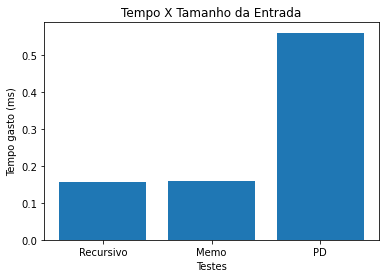

In [32]:
plt.bar(['Recursivo', 'Memo', 'PD'], [t1r*1000, t1m*1000, t1p*1000])
plt.ylabel('Tempo gasto (ms)')
plt.xlabel('Testes')
plt.title('Tempo X Tamanho da Entrada')
plt.show()

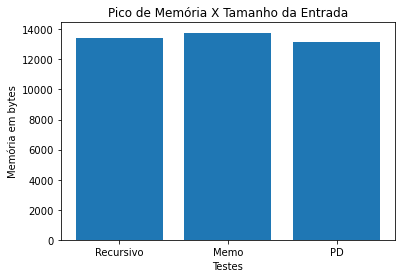

In [33]:
plt.bar(['Recursivo', 'Memo', 'PD'], [pico1r, pico1m, pico1p])
plt.ylabel('Mem√≥ria em bytes')
plt.xlabel('Testes')
plt.title('Pico de Mem√≥ria X Tamanho da Entrada')
plt.show()

<h4><center> Conclus√£o: </center></h4>

O teste 1 apresenta uma entrada muito pequena, o que torna dif√≠cil tirar alguma conclus√£o. Embora o gr√°fico de tempo distoe um pouco para os diferentes algoritmos, trata-se de uma escala muito pequena. Tamb√©m, o pico de mem√≥ria √© muito pr√≥ximo para os mesmos.

<h3><center> Teste 2: </center></h3>

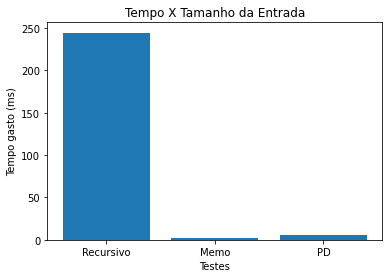

In [34]:
plt.bar(['Recursivo', 'Memo', 'PD'], [t2r*1000, t2m*1000, t2p*1000])
plt.ylabel('Tempo gasto (ms)')
plt.xlabel('Testes')
plt.title('Tempo X Tamanho da Entrada')
plt.show()

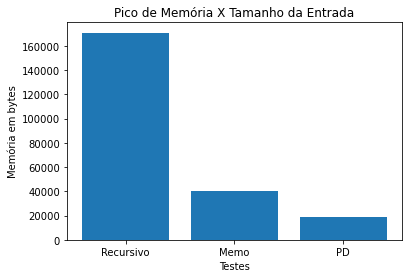

In [35]:
plt.bar(['Recursivo', 'Memo', 'PD'], [pico2r, pico2m, pico2p])
plt.ylabel('Mem√≥ria em bytes')
plt.xlabel('Testes')
plt.title('Pico de Mem√≥ria X Tamanho da Entrada')
plt.show()

<h4><center> Conclus√£o: </center></h4>

Neste teste j√° √© poss√≠vel notar os efeitos do recalculo e da complexidade exponencial do algoritmo recursivo. Ainda que numa escala de tempo pequeno (alguns milissegundos), o algoritmo recursivo executou em um tempo mais de 20 vezes maior do que o algoritmo de Programa√ß√£o Din√¢mica. Al√©m disso, seu pico de mem√≥ria registrado tamb√©m foi muito superior. 

<h3><center> Teste 3: </center></h3>

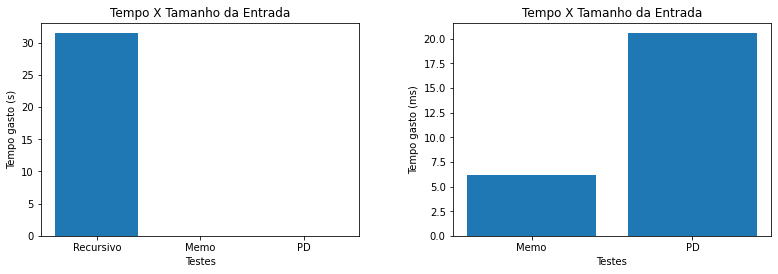

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].bar(['Recursivo', 'Memo', 'PD'], [t3r, t3m, t3p])
ax[0].set_ylabel('Tempo gasto (s)')
ax[0].set_xlabel('Testes')
ax[0].set_title('Tempo X Tamanho da Entrada')

ax[1].bar(['Memo', 'PD'], [t3m*1000, t3p*1000])
ax[1].set_ylabel('Tempo gasto (ms)')
ax[1].set_xlabel('Testes')
ax[1].set_title('Tempo X Tamanho da Entrada')

fig.tight_layout(pad=5.0)
plt.show()

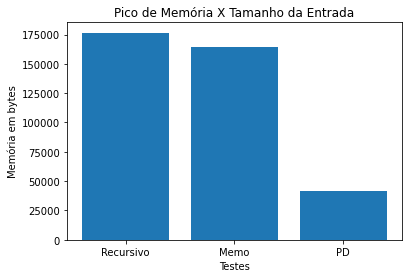

In [37]:
plt.bar(['Recursivo', 'Memo', 'PD'], [pico3r, pico3m, pico3p])
plt.ylabel('Mem√≥ria em bytes')
plt.xlabel('Testes')
plt.title('Pico de Mem√≥ria X Tamanho da Entrada')
plt.show()

<h4><center> Conclus√£o: </center></h4>

Conforme cresce a entrada, mais o algoritmo recursivo se distancia dos outros em termos de tempo gasto, seguindo a mesma ou semelhante l√≥gica para o teste passado. Contudo, em termos de pico de mem√≥ria, o algoritmo recursivo n√£o destoou muito do teste passado, diferente do algoritmo memoizado, que teve um aumento consider√°vel, se aproximando do pico do algoritmo recursivo.

<h3><center> Teste 4: </center></h3>

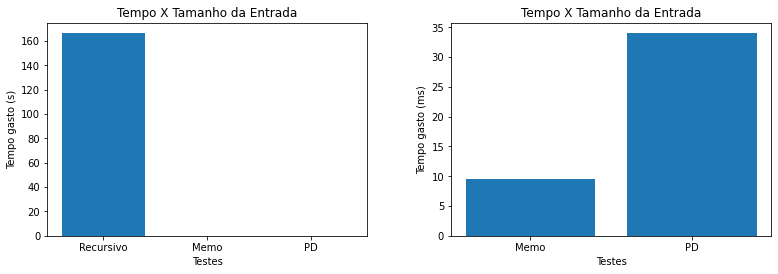

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].bar(['Recursivo', 'Memo', 'PD'], [t4r, t4m, t4p])
ax[0].set_ylabel('Tempo gasto (s)')
ax[0].set_xlabel('Testes')
ax[0].set_title('Tempo X Tamanho da Entrada')

ax[1].bar(['Memo', 'PD'], [t4m*1000, t4p*1000])
ax[1].set_ylabel('Tempo gasto (ms)')
ax[1].set_xlabel('Testes')
ax[1].set_title('Tempo X Tamanho da Entrada')

fig.tight_layout(pad=5.0)
plt.show()

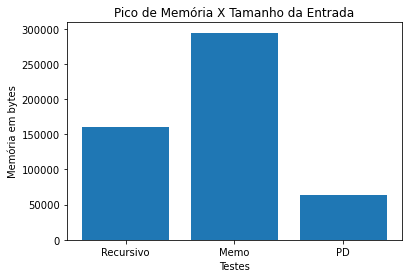

In [39]:
plt.bar(['Recursivo', 'Memo', 'PD'], [pico4r, pico4m, pico4p])
plt.ylabel('Mem√≥ria em bytes')
plt.xlabel('Testes')
plt.title('Pico de Mem√≥ria X Tamanho da Entrada')
plt.show()

<h4><center> Conclus√£o: </center></h4>

Mesmo apresentando um tempo, em m√©dia menor, esse teste mostrou que o algoritmo memoizado tende a consumir muito mais mem√≥ria a partir de um crescimento/tamanho da entrada, visto que os outros algoritmos apresentaram um crescimento brando/est√°vel no pico de mem√≥ria, diferentemente do memoizado.

### Conclus√£o do Comparativo 1:

Os testes demonstram bem as limita√ß√µes do algoritmo recursivo, que mesmo mantendo um pico de mem√≥ria est√°vel conforme o crescimento da entrada, apresentou um crescimento alt√≠ssimo em termos de tempo gasto. 

Os algoritmos memoizado e de programa√ß√£o din√¢mica se mostram muito melhores em termos de tempo gasto, se mantendo na casa do milissegundos para todas as entradas testadas.

Mesmo apresentando um tempo, em m√©dia, menor quando comparado ao algoritmo de PD, o algoritmo memoizado tende a consumir muito mais mem√≥ria a partir de um crescimento/tamanho da entrada (como ficou exemplificado no teste 4). Por isso, acredita-se que esse seria um fator limitante ainda mais precoce para o algoritmo memoizado, nos levando a crer que o algoritmo de Programa√ß√£o Din√¢mica (PD) apresenta o melhor desempenho em termos de tempo-mem√≥ria.

## Comparativo 2

<h2><center> Testes de Corretude: </center></h2>

<div class="alert alert-block alert-warning"><b>Metodologia: </b> Os testes consistem em executar os algoritmos de Programa√ß√£o Din√¢mica e de Aproxima√ß√£o com a mesma entrada (a maior entrada utilizda nos testes), e ent√£o avaliar, dentre outras coisas, a corretude da aproxima√ß√£o ao variar o valor de "Œµ"</div>

<h4><center> Œµ = 0,2 </center></h4>

In [40]:
mochila = MochilaA()
tracemalloc.start()
start = timer()

mochila.resolve(130, lista_coisas4, 0.20)

end = timer()
_, pico02 = tracemalloc.get_traced_memory()
tracemalloc.stop()

t02 = end - start
r02 = mochila.resposta
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t02}s")
print(f"Pico de mem√≥ria: {pico02}b")

Œµ = 0.2
Resultado: 714.0
Tempo gasto: 0.033703600000023926s
Pico de mem√≥ria: 63615b


<h4><center> Œµ = 0,3 </center></h4>

In [41]:
mochila = MochilaA()
tracemalloc.start()
start = timer()

mochila.resolve(130, lista_coisas4, 0.30)

end = timer()
_, pico03 = tracemalloc.get_traced_memory()
tracemalloc.stop()

t03 = end - start
r03 = mochila.resposta
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t03}s")
print(f"Pico de mem√≥ria: {pico03}b")

Œµ = 0.3
Resultado: 475.0
Tempo gasto: 0.034214700000006815s
Pico de mem√≥ria: 63632b


<h4><center> Œµ = 0,4 </center></h4>

In [42]:
mochila = MochilaA()
tracemalloc.start()
start = timer()

mochila.resolve(130, lista_coisas4, 0.40)

end = timer()
_, pico04 = tracemalloc.get_traced_memory()
tracemalloc.stop()

t04 = end - start
r04 = mochila.resposta
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t04}s")
print(f"Pico de mem√≥ria: {pico04}b")

Œµ = 0.4
Resultado: 352.0
Tempo gasto: 0.0339341000000104s
Pico de mem√≥ria: 64288b


<h4><center> Œµ = 0,5 </center></h4>

In [43]:
mochila = MochilaA()
tracemalloc.start()
start = timer()

mochila.resolve(130, lista_coisas4, 0.50)

end = timer()
_, pico05 = tracemalloc.get_traced_memory()
tracemalloc.stop()

t05 = end - start
r05 = mochila.resposta
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t05}s")
print(f"Pico de mem√≥ria: {pico05}b")

Œµ = 0.5
Resultado: 281.0
Tempo gasto: 0.03381820000004154s
Pico de mem√≥ria: 64352b


### Conclus√£o do Comparativo 2:

Considerando que a respsota √≥tima para o teste √©: 769

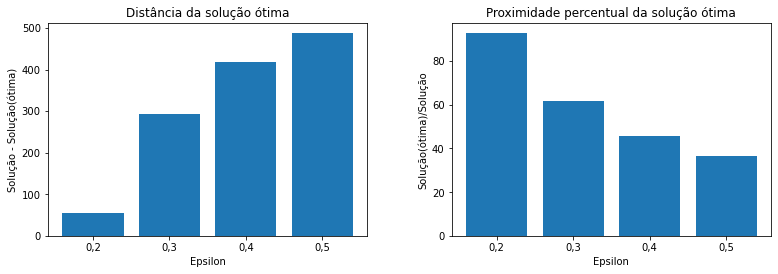

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].bar(['0,2', '0,3', '0,4', '0,5'], [769-r02, 769-r03, 769-r04, 769-r05])
ax[0].set_ylabel('Solu√ß√£o - Solu√ß√£o(√≥tima)')
ax[0].set_xlabel('Epsilon')
ax[0].set_title('Dist√¢ncia da solu√ß√£o √≥tima')

ax[1].bar(['0,2', '0,3', '0,4', '0,5'], [(r02*100)/769, (r03*100)/769, (r04*100)/769, (r05*100)/769])
ax[1].set_ylabel('Solu√ß√£o(√≥tima)/Solu√ß√£o')
ax[1].set_xlabel('Epsilon')
ax[1].set_title('Proximidade percentual da solu√ß√£o √≥tima')

fig.tight_layout(pad=5.0)
plt.show()

#### Tempo e mem√≥ria

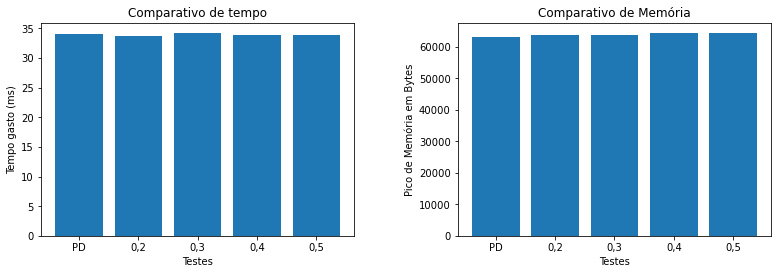

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].bar(['PD', '0,2', '0,3', '0,4', '0,5'], [t4p*1000, t02*1000, t03*1000, t04*1000, t05*1000])
ax[0].set_ylabel('Tempo gasto (ms)')
ax[0].set_xlabel('Testes')
ax[0].set_title('Comparativo de tempo')

ax[1].bar(['PD', '0,2', '0,3', '0,4', '0,5'], [pico4p, pico02, pico03, pico04, pico05])
ax[1].set_ylabel('Pico de Mem√≥ria em Bytes')
ax[1].set_xlabel('Testes')
ax[1].set_title('Comparativo de Mem√≥ria')

fig.tight_layout(pad=5.0)
plt.show()

Como esperado, o algoritmo erra, mas n√£o erra muito para valores pequenos de Epsilon.

Contudo, n√£o foi poss√≠vel perceber uma altera√ß√£o no tempo gasto para executar o teste, diferente do cen√°rio proposto em sala, em que: quanto maior o valor de epsilon, mais r√°pido seria o algoritmo, mas tamb√©m mais impreciso.

Sim, a imprecis√£o √© claramente not√°vel, mas o tempo gasto para executar n√£o.

Al√©m disso, ressaltamos que o comparativo de mem√≥ria atende ao esperado, visto que o pr√©-processamento de dados do algoritmo de aproxima√ß√£o n√£o deve apresentar um custo em mem√≥ria relevante, quando comparado √† matriz de dados de tamanho $ ùëõ‚àóùëò $ (com n = Tamanho do subconjunto e k = Capacidade da mochila) presente em ambos.